# Download Connections Data

--2025-08-04 18:14:50--  https://codex.flywire.ai/api/download?data_product=connections_princeton&dataset=fafb
142.250.73.147, 2607:f8b0:400a:806::2013e.ai)... 
Connecting to codex.flywire.ai (codex.flywire.ai)|142.250.73.147|:443... connected.
200 OKequest sent, awaiting response... 
Length: 7342 (7.2K) [text/html]
Saving to: ‘connections_filtered.csv’

connections_filtere 100%[===================>]   7.17K  --.-KB/s    in 0.001s  

2025-08-04 18:14:50 (11.4 MB/s) - ‘connections_filtered.csv’ saved [7342/7342]



In [8]:
import pandas as pd

df = pd.read_csv("connections_princeton.csv")
df.head()

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940625363947,720575940623224444,ME_L,12,GABA
1,720575940630432382,720575940618518557,ME_L,67,ACH
2,720575940627314521,720575940626337738,ME_L,10,GABA
3,720575940620280405,720575940620204726,ME_L,15,ACH
4,720575940636942447,720575940613789411,LA_L,1,GLUT


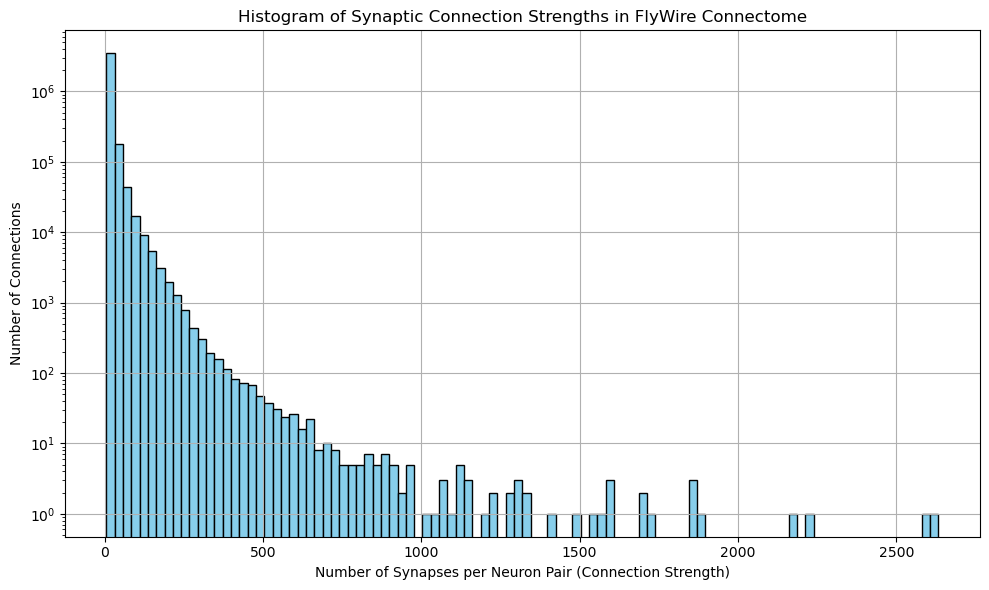

In [10]:
import pandas as pd

# Assuming you already loaded the full file into df
edges = (
    df.groupby(['pre_root_id', 'post_root_id'])['syn_count']
    .sum()
    .reset_index()
    .rename(columns={'pre_root_id': 'source', 'post_root_id': 'target', 'syn_count': 'weight'})
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(edges['weight'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel("Number of Synapses per Neuron Pair (Connection Strength)")
plt.ylabel("Number of Connections")
plt.title("Histogram of Synaptic Connection Strengths in FlyWire Connectome")
plt.yscale("log")  # Optional: makes the long tail more visible
plt.grid(True)
plt.tight_layout()
plt.show()

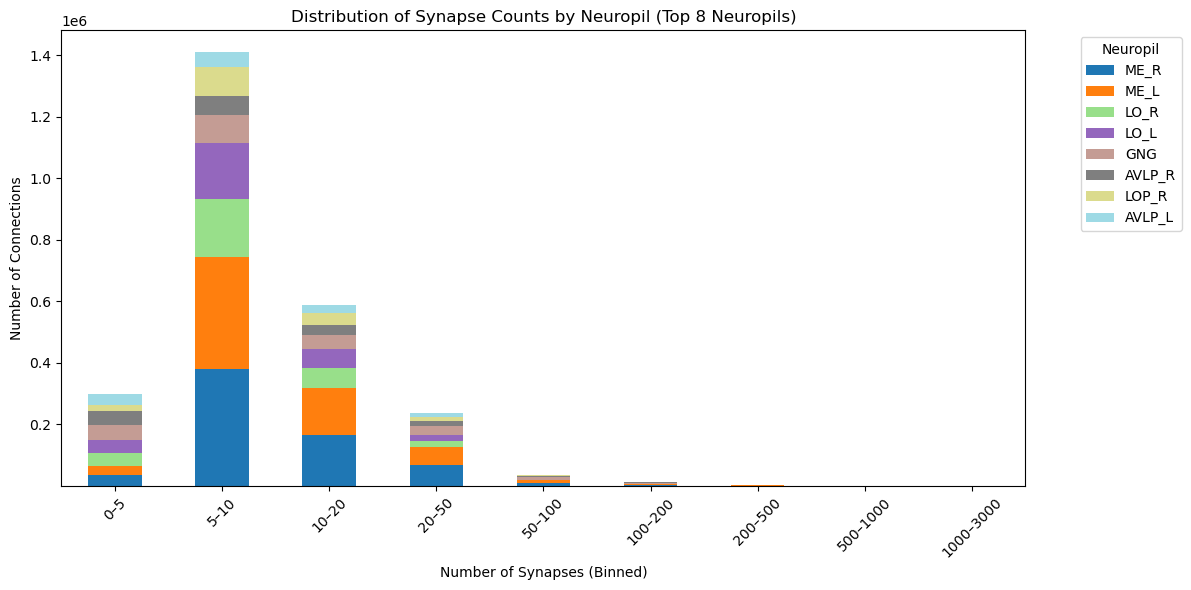

In [11]:
import numpy as np

# Add a column for binned synapse counts (e.g., 1–5, 6–10, ...)
df['syn_bin'] = pd.cut(df['syn_count'], bins=[0,5,10,20,50,100,200,500,1000,3000], right=False)

# Count number of connections per bin per neuropil
bin_neuropil_counts = df.groupby(['syn_bin', 'neuropil'], observed=True).size().unstack(fill_value=0)
import matplotlib.pyplot as plt

# Choose top 5–10 neuropils for color clarity
top_neuropils = df['neuropil'].value_counts().head(8).index
bin_neuropil_counts = bin_neuropil_counts[top_neuropils]

# Plot
bin_labels = [f"{int(b.left)}–{int(b.right)}" for b in bin_neuropil_counts.index]

bin_neuropil_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.xticks(ticks=np.arange(len(bin_labels)), labels=bin_labels, rotation=45)
plt.xlabel("Number of Synapses (Binned)")
plt.ylabel("Number of Connections")
plt.title("Distribution of Synapse Counts by Neuropil (Top 8 Neuropils)")
plt.legend(title="Neuropil", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

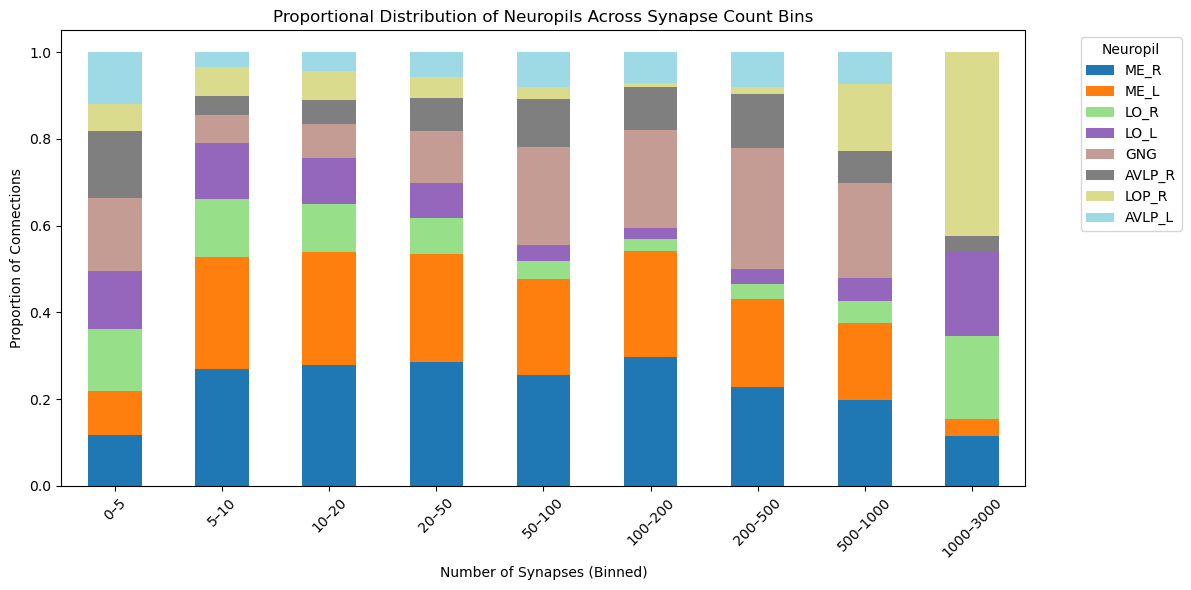

In [12]:
# Normalize each row to sum to 1 (i.e., get proportions)
bin_neuropil_proportions = bin_neuropil_counts.div(bin_neuropil_counts.sum(axis=1), axis=0)

import matplotlib.pyplot as plt
import numpy as np

bin_labels = [f"{int(b.left)}–{int(b.right)}" for b in bin_neuropil_proportions.index]

# Plot
bin_neuropil_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

plt.xticks(ticks=np.arange(len(bin_labels)), labels=bin_labels, rotation=45)
plt.xlabel("Number of Synapses (Binned)")
plt.ylabel("Proportion of Connections")
plt.title("Proportional Distribution of Neuropils Across Synapse Count Bins")
plt.legend(title="Neuropil", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()